In [1]:
#import sklearn datasets
from sklearn.datasets import load_iris

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = load_iris()

In [4]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [5]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [6]:
df_iris['species_target'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [7]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


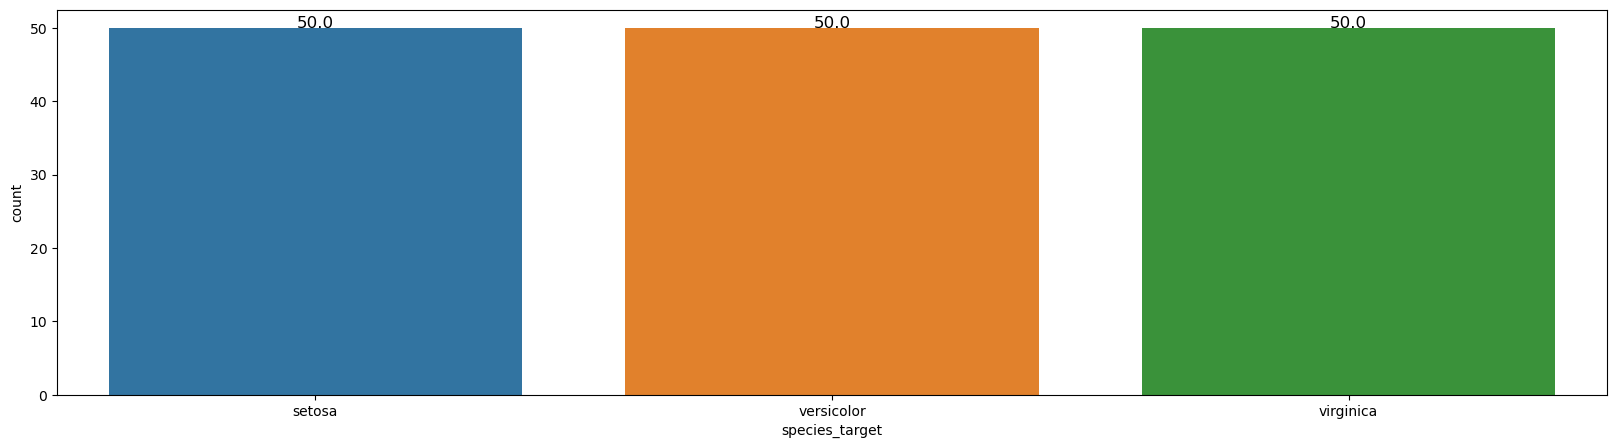

In [8]:
plt.figure(figsize=(20, 5))
ax = sns.countplot(x=df_iris['species_target'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=12, color='black')
    
# the 3 species have the same count from the dataset

<Axes: xlabel='sepal length (cm)', ylabel='count'>

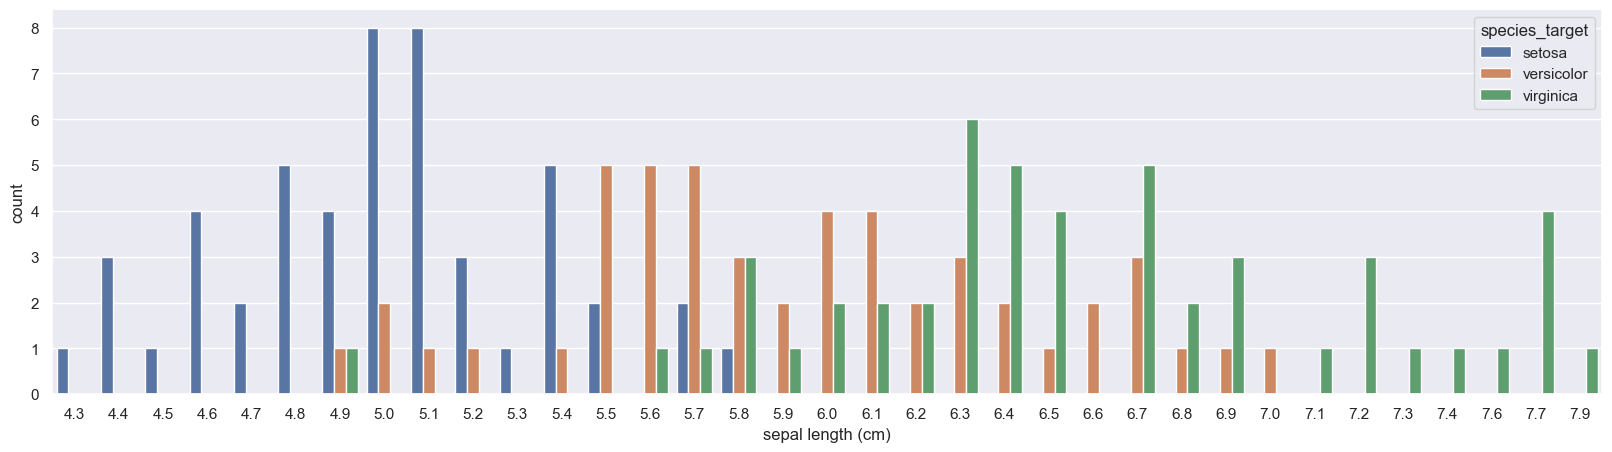

In [9]:
plt.figure(figsize=(20, 5))
sns.set(style="darkgrid")
sns.countplot(x='sepal length (cm)', hue='species_target', data=df_iris)

In [10]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# TRAIN DATA

In [21]:
# extracting X and y variables
X = df_iris.drop('species_target', axis=1)
y = df_iris['species_target']

In [22]:
# import lib/package for training model
from sklearn.model_selection import train_test_split

In [23]:
# set up the train and test; set the test size to 25% and the remaining 75% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [24]:
# check the dimension of training set
X_train.shape, y_train.shape

((112, 4), (112,))

In [25]:
# check the dimension of test set
X_test.shape, y_test.shape

((38, 4), (38,))

In [26]:
# lib for making the random forest
from sklearn.ensemble import RandomForestClassifier

In [27]:
# define random forest model
rf_model = RandomForestClassifier()

In [28]:
# fit the model
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
# apply trained model to make prediction -- test set
y_pred = rf_model.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica'], dtype=object)

In [52]:
# viewing predicted probabilities of the first 10 observations
rf_model.predict_proba(X_test[:10])

array([[0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.97, 0.03],
       [0.  , 0.93, 0.07],
       [1.  , 0.  , 0.  ],
       [0.  , 0.54, 0.46],
       [0.97, 0.03, 0.  ],
       [0.  , 0.99, 0.01],
       [0.  , 0.96, 0.04]])

In [58]:
from sklearn.metrics import confusion_matrix

In [64]:
print(confusion_matrix(y_test, y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]


In [61]:
pd.crosstab(y_test, y_pred)

col_0,setosa,versicolor,virginica
species_target,,,
setosa,13,0,0
versicolor,0,15,1
virginica,0,1,8


In [65]:
# there are 2 inaccurate predictions and 36 correct predictions

In [69]:
from sklearn.metrics import accuracy_score

In [74]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 94.74


In [66]:
# show report about the model
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      0.94      0.94        16
   virginica       0.89      0.89      0.89         9

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [75]:
df_iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_target
125,7.2,3.2,6.0,1.8,virginica
6,4.6,3.4,1.4,0.3,setosa
8,4.4,2.9,1.4,0.2,setosa
21,5.1,3.7,1.5,0.4,setosa
65,6.7,3.1,4.4,1.4,versicolor


In [84]:
# try to test the prediction capability
rf_model.predict([[7.2, 3.2, 6, 1.8], [4.4, 2.9, 1.4, 0.2], [6.7, 3.1, 4.4, 1.4], [5.2, 3.6, 1.5, 0.3]])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['virginica', 'setosa', 'versicolor', 'setosa'], dtype=object)